## Medidas Estatísticas

Resumir dados em uma única medida estatística pode trazer interpretações tendenciosas em alguns casos. Para motivar nosso aprendizado acerca deste tema, buscamos responder às seguintes perguntas para encontrar representações fiéis dos nossos dados.

* Qual a frequência (contagem) que cada valor (ou intervalo de valores) aparece no conjunto de dados?
* Quais são alguns valores típicos do conjunto de dados, como mínimo e máximo?
* Qual seria um valor para representar a posição central do conjunto de dados? 
* Qual seria uma medida da variabilidade ou dispersão dos dados?
* Existem valores atípicos (outliers) no conjunto de dados?
* A distribuição de frequências pode ser considerada simétrica? 
* Qual é o problema que quero resolver e quais ferramentas usar?


Para responder a estas perguntas, nosso objetivo é apresentar as medidas resumo e a partir delas construir gráficos e tabelas. Agora vamos apresentar alguns conceitos importantes que usaremos com frequência. Ao responder estas perguntas, muitos outros questionamentos surgirão… E a partir desses questionamentos, a análise se aprofunda no entendimento de como o conjunto de dados está disposto. 

## Tipos de Variáveis

A primeira tarefa de uma análise estatística consiste em **resumir as informações de um conjunto de dados**. E para isso, precisamos conhecer os tipos de variáveis existentes antes de pensar em resumi-las.


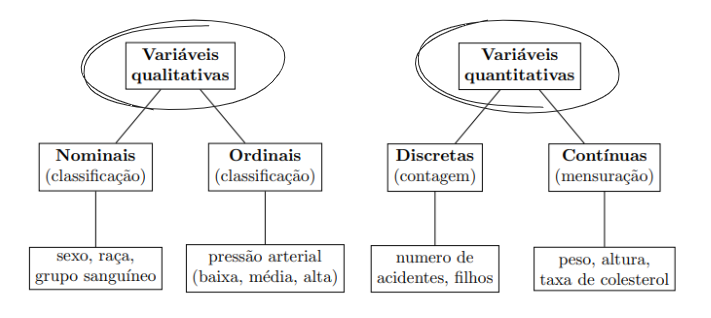

Quando buscamos uma distribuição de frequência para variáveis qualitativas do nosso conjunto de dados, calculamos a quantidade de vezes que cada valor ocorre e criamos um gráfico de barras. Este gráfico é muitas vezes chamado de histograma ou distribuição dos dados. 

Quando buscamos uma distribuição de frequência para variáveis quantitativas, podemos agrupá-las em intervalos, criando assim novas variáveis qualitativas. Desta forma podemos melhor visualizar o histograma de uma determinada variável quantitativa.


## Medidas de Resumo

As medidas de posição mais utilizadas são a ***média*** e a ***mediana***. 

### Média

A média de uma variável $X$ é definida pela fórmula $$media(X)= \mu =\dfrac{1}{n}\sum_{i=1}^n x_i$$ 

Observe que a média pode ser calculada tanto quando $x_i$ é um número, quanto para quando $x_i$  é um vetor. Note como a média nos dá uma medida de centralidade das observações:

### Mediana

A mediana é uma medida também de centralidade, mas em relação à ordem dos valores. É calculada apenas para variáveis que são números. Sua definição é

\begin{align}
\text{mediana}(x) = \left\{
\begin{array}{cl}
x_{(\frac{n+1}{2})} &  \text{ se }
    n \text{ for par} \\
\frac{1}{2}[x_{(\frac{n}{2})}+x_{(\frac{n}{2}+1)}] &  \text{ se }
    n \text{ for par}
\end{array}
\right.
\end{align}

Sendo assim, a mediana nos dá uma medida de centralidade ordenada,
por exemplo, 50% das observações estão abaixo de certo valor e 50% 
estão acima. E podemos nos perguntar por exemplo, o que acontece se a mediana estiver acima da média? e abaixo??

## Medidas de Dispersão

Vimos como resumir nossos dados de forma a considerar suas posições. Agora, vamos ver duas medidas importantes sobre a dispersão dos nossos dados quantitativos.

Se a média nos dá uma medida de posição, a variância e o desvio padrão vão nos dar uma medida de espalhamento dos nossos dados.

### Variância

A variância de uma variável $X$ de média $\mu$ com $n$ observações é calculada como 

$$
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^n(x_i - \mu)^2
$$

No gráfico ao lado, colocamos a variância estipulando um intervalo ao redor da média. Isto é comum pois na maioria das vezes estamos interessados em entender o comportamento dos dados ao redor da média.

### Desvio Padrão

O desvio padrão é a raiz quadrada da variância, ou seja, 

$$
\text{dp}(x)=\sqrt{\sigma^2}=\sigma.
$$

Observe que a variância e o desvio padrão acontecem em escalas diferentes. Considere que a variável $X$ é representada numa unidade de medida em metros. A variância eleva o quadrado a diferença das observações da média, e soma, portanto a unidade resultante estará em metros quadrados. O desvio padrão tira a raiz quadrada deste número para voltar para a unidade de medida original. 



## Exemplos: Dataset IRIS

In [12]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
print('Quantidade de linhas e colunas:', iris.shape)
print('Quantidade de dados nulos:', iris.isna().sum().sum())

Quantidade de linhas e colunas: (150, 5)
Quantidade de dados nulos: 0


In [14]:
# A coluna Dtype abaixo indica o tipo de dados das colunas (variáveis) do dataset iris
# Note que todas são float exceto species que é object (que é uma string no caso)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='sepal_width', ylabel='species'>

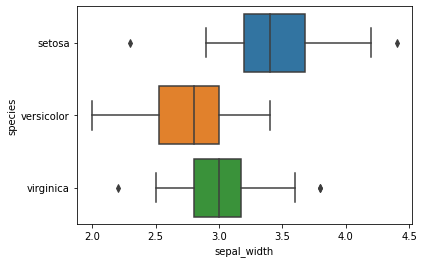

In [15]:
# O Box plot nos da uma visão dos Quartis de dados. 
# O risco no meio da caixa indica a média (posição)

sns.boxplot(y=iris["species"], x=iris['sepal_width'])

* Qual é a média de largura e altura das pétalas da espécie setosa? E a variância?

## Intervalo de Confiança

Nos contextos reais, queremos descrever, resumir e fazer inferência sobre a distribuição de uma variável aleatória $X$. Em geral, as variáveis são representadas por diversas medidas que dependem do problema envolvido.

Com a média, variância e desvio padrão, temos parâmetros para estimar a distribuição dos dados como uma distribuição normal. Essa extrapolação, dizendo que a distribuição da variável é normal, nem sempre condiz com a real natureza da amostra finita que estamos considerando. 

Algumas considerações estatísticas (ver [1] página 76-77) nos levam a criar uma margem de erro que é uma medida de nossa incerteza nessa extrapolação feita. Em posse de um número de amostras n suficientemente grande, podemos dizer que o intervalo de 95 % de confiança para o valor esperado da variável $X$ é dados pelos extremos:

$$
\mu \pm 1,96\dfrac{\sigma}{n} 
$$

## Correlação

É uma medida para quantificar o quanto duas variáveis X e Y estão relacionadas. É calculada pela fórmula

$$
\text{corr}(X,Y) = \dfrac{\sum_{i=1}^n (x_i - \mu_X)(y_i - \mu_Y)}{[\sum_{i=1}^n (x_i - \mu_X)^2 * \sum_{i=1}^n(y_i - \mu_Y)^2]^{1/2}}.
$$

A correlação varia entre -1 e 1. Seu valor indica se a relação é diretamente ou inversamente proporcional. Existem também outras correlações, como a de Pearson, Spearman e Kendall. 



### Correlação não implica causalidade!

É muito importante observar que mesmo uma correlação forte não implica que A “causa” B!

Determinar se existe de fato uma relação de causalidade requer  investigação adicional, pois diversas situações podem ocorrer.

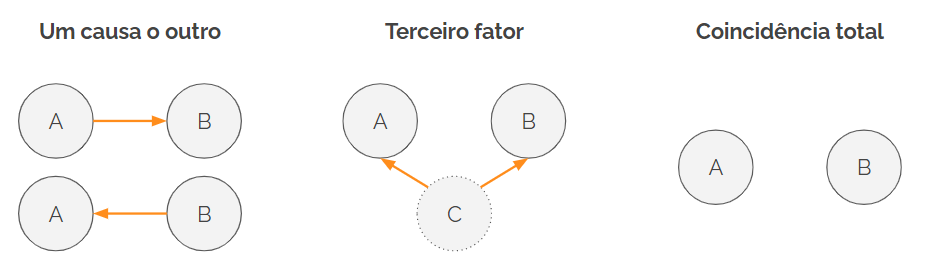


## Referências e Links